In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Matplotlib에서 한국어 폰트를 사용하지 않도록 설정
plt.rcParams['font.family'] = 'DejaVu Sans'  # 영어 전용 폰트 설정

# CSV 파일 경로 설정 (여기서 'your_file.csv'를 실제 파일 경로로 수정)
file_path = '대전광역시_중구_여행업_20241220.csv'

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 데이터 확인 (상위 5개)
print(df.head())

# 1. 업종별 여행사 개수 시각화
industry_counts = df['업종'].value_counts()

plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Travel Agencies by Industry', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Agencies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. 연락처 유무별 여행사 시각화
# 연락처 유무 확인
df['Contact_Exist'] = np.where(df['연락처'].isna(), 'No Contact', 'Contact Available')

contact_counts = df['Contact_Exist'].value_counts()

plt.figure(figsize=(8, 6))
contact_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'], startangle=90, legend=True)
plt.title('Travel Agencies with or without Contact Information', fontsize=14)
plt.ylabel('', fontsize=0)
plt.tight_layout()
plt.show()

# 3. 데이터 기준일자별 여행사 분포 시각화
# '데이터기준일자' 컬럼을 날짜 형식으로 변환
df['Date'] = pd.to_datetime(df['데이터기준일자'])

# 날짜별 여행사 개수 세기
date_counts = df['Date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
date_counts.plot(kind='line', marker='o', color='b')
plt.title('Number of Travel Agencies by Date', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Agencies', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. 업종별 연락처 유무 비교
industry_contact_counts = df.groupby(['업종', 'Contact_Exist']).size().unstack()

plt.figure(figsize=(12, 6))
industry_contact_counts.plot(kind='bar', stacked=True, color=['lightcoral', 'lightgreen'])
plt.title('Comparison of Contact Information by Industry', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Agencies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 5. 연락처가 없는 여행사의 비율과 업종별로 나누어서 분석
contact_missing_by_industry = df[df['Contact_Exist'] == 'No Contact'].groupby('업종').size()

plt.figure(figsize=(10, 6))
contact_missing_by_industry.plot(kind='bar', color='lightcoral')
plt.title('Number of Agencies with Missing Contact Information by Industry', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Agencies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 6. 여행사의 업종별 분포 비율
industry_percentage = (industry_counts / industry_counts.sum()) * 100

plt.figure(figsize=(10, 6))
industry_percentage.plot(kind='bar', color='skyblue')
plt.title('Industry Distribution of Travel Agencies', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Percentage of Agencies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


            Outcome    Week End Age Group  Unvaccinated Rate  Vaccinated Rate  \
0            Deaths  10/01/2022       All                0.3              0.1   
1            Deaths  07/09/2022       0-4                0.0              NaN   
2             Cases  11/12/2022       0-4               82.4              5.5   
3  Hospitalizations  08/13/2022       0-4                7.4              0.0   
4             Cases  02/26/2022       0-4               54.1              NaN   

   Boosted Rate  Crude Vaccinated Ratio  Crude Boosted Ratio  \
0           0.9                     3.0                  0.3   
1           NaN                     NaN                  NaN   
2           NaN                    15.0                  NaN   
3           NaN                     NaN                  NaN   
4           NaN                     NaN                  NaN   

   Age-Adjusted Unvaccinated Rate  Age-Adjusted Vaccinated Rate  ...  \
0                             0.4                       

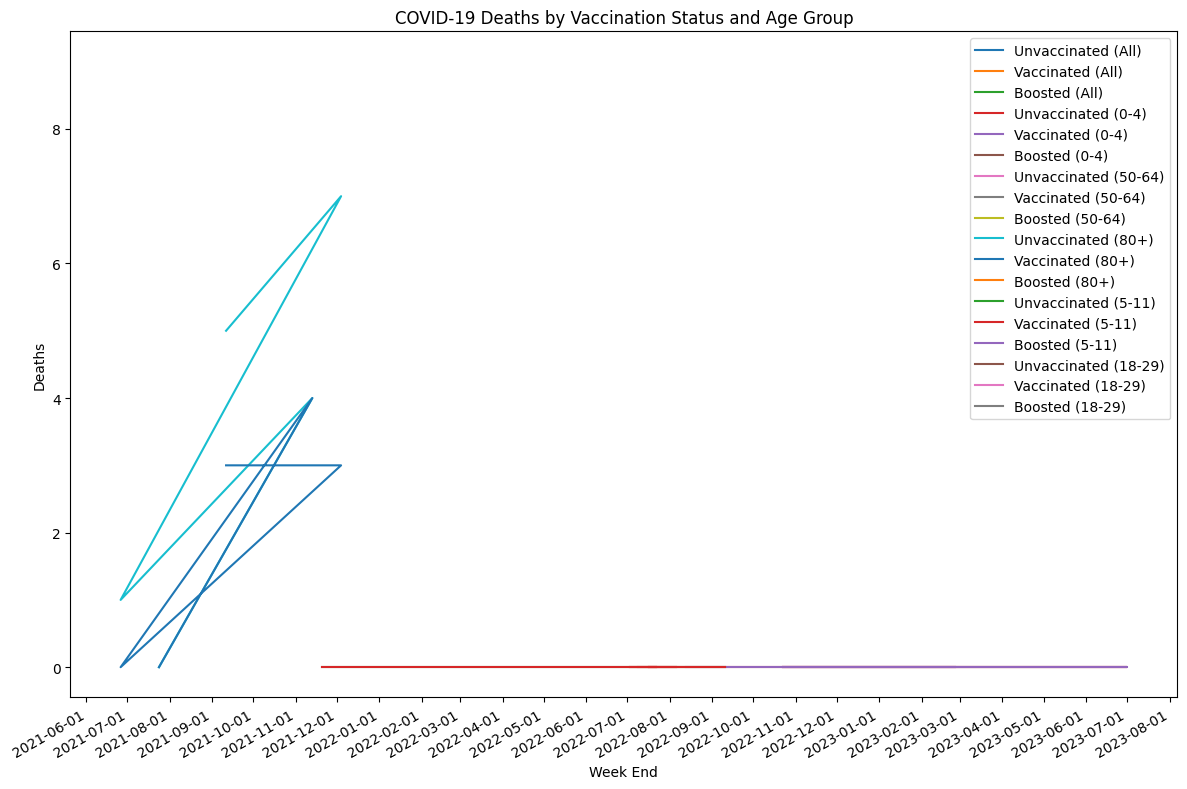

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# CSV 파일 불러오기
data = pd.read_csv('COVID-19_Outcomes_by_Vaccination_Status_-_Historical.csv')

# 데이터의 앞부분을 확인하여 형식을 파악합니다
print(data.head())
print(data.columns)

# 날짜형식 변환 (만약 'Week End' 컬럼이 날짜로 되어 있다면)
data['Week End'] = pd.to_datetime(data['Week End'], errors='coerce')

# 특정 변수(예: Deaths, Cases, Hospitalizations)의 전반적인 경향을 시각화할 수 있습니다.

# 3. 주요 변수 선택 및 전처리
# 예시로 'Deaths' 데이터를 분석

# Deaths 컬럼에서 특정 연령대와 백신 상태별로 확인
death_data = data[data['Outcome'] == 'Deaths']

# 연령대별로 데이터를 그룹화하여 시각화
age_groups = death_data['Age Group'].unique()

# 여러 연령대에 대한 데이터를 각각 시각화합니다.
plt.figure(figsize=(12, 8))

for age_group in age_groups:
    age_group_data = death_data[death_data['Age Group'] == age_group]
    
    # 날짜에 따른 백신 상태별 사망률을 플로팅
    plt.plot(age_group_data['Week End'], age_group_data['Outcome Unvaccinated'], label=f"Unvaccinated ({age_group})")
    plt.plot(age_group_data['Week End'], age_group_data['Outcome Vaccinated'], label=f"Vaccinated ({age_group})")
    plt.plot(age_group_data['Week End'], age_group_data['Outcome Boosted'], label=f"Boosted ({age_group})")

# x-axis 레이블 형식 조정
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

# 그래프에 제목과 레이블 추가
plt.title("COVID-19 Deaths by Vaccination Status and Age Group")
plt.xlabel("Week End")
plt.ylabel("Deaths")
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()
